### Python - Web Scraping from <b> https://4dayweek.io/ </b> Website

#### Import the required libraries

In [2]:
# Import BeautifulSoup and Requests for Web Scraping
from bs4 import BeautifulSoup
import requests

# Import JSON Module to manipulate Website's JSON Data
import json

# Import Pandas for Data Manipulation
import pandas as pd

# Import Matplotlib for Data Visualization
import matplotlib.pyplot as plt

# To use regular expressions to search use re Module
import re

#### Define Functions for Reusability 

##### Since the Job's List comes in a JSON Object in script tag we extract that from the webPage

In [3]:
def scrape4DayWeekData( urlToScrape ):

    # To check if a Valid URL was sent
    
    if urlToScrape:
        
        webPage = requests.get( urlToScrape )
        
        beautifulSoupObj = BeautifulSoup( webPage.content, 'html.parser' )

        scriptTag = beautifulSoupObj.find_all( 'script' )

        # Remove New Line Escape Character '\n' from the JSON Array
        scriptTag = scriptTag[0].text.replace('\\n','')

        # print( scriptTag )

    return scriptTag

##### Create DataFrame and Visualize the Data based on a list of Pre-Defined Skills

In [4]:
def createDataFrame( jobJSON, preDefinedSkillsList ):
    
    # Extracting skills using regular expression
    extractedSkills = re.findall( r'\b\w+\b', jobJSON ) 

    # Filtering and counting predefined skills
    skill_counts = { skill: extractedSkills.count(skill) for skill in preDefinedSkillsList }
    print( 'Skill Counts: \n', skill_counts )

    # Creating the Dictionary for the Pandas DataFrame
    skillData = {'Skill': list(skill_counts.keys()), 'Count': list(skill_counts.values())}
    print( 'Skill Data: \n', skillData )

    # Creating a Pandas DataFrame 
    df = pd.DataFrame( skillData )

    return df

In [5]:
def visualizeDataFrame( jobs_df, jobCnt ):
    
    # Visualize the Skills DataFrame 
    plt.figure(figsize=(10, 6))
    bars = plt.bar(jobs_df['Skill'], jobs_df['Count'], align='center')
    
    plt.title( 'Skills Count for Total Jobs = ' + jobCnt )
    plt.xlabel('Skills')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.fill()
    
    # Adding value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, yval, ha='center', va='bottom', fontsize=10, color='teal')

    plt.show()

##### Find Exact postion of Text in the JSON Object

In [6]:
def getTextPositionFromJSON( scriptTag, textToSearch ):
    return ( ( scriptTag.find(textToSearch) ) + ( len(textToSearch) ) )

##### Get Total Count of Jobs

In [7]:
def getJobCountFromJSON( jsonObj ):
    jobList = jsonObj[ jsonObj.rfind( '"itemIds":' ) : jsonObj.find(',"loading"') ].split(':')
    print( 'jobList: ', jobList )
    
    # Convert String to List
    jsonVal = json.loads( jobList[1] )
    print( jsonVal, ' - ', type(jsonVal), ' -- ', len(jsonVal) )

    return len( jsonVal )

***

#### Create a function to Call all functions one by one

In [8]:
def entryPoint( urlToScrape, preDefinedSkills ):
    if urlToScrape:
        # Get the Script Tag to Extract the Jobs-List JSON Object 
        scriptTag = scrape4DayWeekData( urlToScrape )

        if scriptTag:
            # Get Jobs-List Start
            jobsList_start = getTextPositionFromJSON( scriptTag, '"jobs_list":' )
            # Get Jobs-List End
            jobsList_end = getTextPositionFromJSON( scriptTag, ',"id":"list"}}' )
            print( 'JSON Start : ', jobsList_start, ' \t JSON End : ', jobsList_end )
            
            # Create the Job-List JSON Object 
            jobList_json = scriptTag[ jobsList_start : jobsList_end ]

            # Get a Total Count of Jobs Scraped
            jobList_count = getJobCountFromJSON( jobList_json ) 

            print( jobList_count, '-- ', type(jobList_count) )

            # Create the Pandas DataFrame
            jobs_df = createDataFrame( jobList_json, preDefinedSkills )

            # Visualize the DataFrame
            visualizeDataFrame( jobs_df, str(jobList_count) )
            
        else:
            print( 'Issue with Scraping Data from this Website!!' )
  
    else:
        print( 'URL not provided' )

***

#### For Data Analyst Jobs

JSON Start :  556  	 JSON End :  29028
jobList:  ['"itemIds"', '[9962,8059,7833,7102]']
[9962, 8059, 7833, 7102]  -  <class 'list'>  --  4
4 --  <class 'int'>
Skill Counts: 
 {'SQL': 4, 'Python': 2, 'Tableau': 4, 'PowerBI': 2, 'Excel': 1, 'Analytics': 5, 'AWS': 3, 'SAS': 0, 'Spark': 0, 'Docker': 1, 'Ruby': 1, 'Looker': 2}
Skill Data: 
 {'Skill': ['SQL', 'Python', 'Tableau', 'PowerBI', 'Excel', 'Analytics', 'AWS', 'SAS', 'Spark', 'Docker', 'Ruby', 'Looker'], 'Count': [4, 2, 4, 2, 1, 5, 3, 0, 0, 1, 1, 2]}


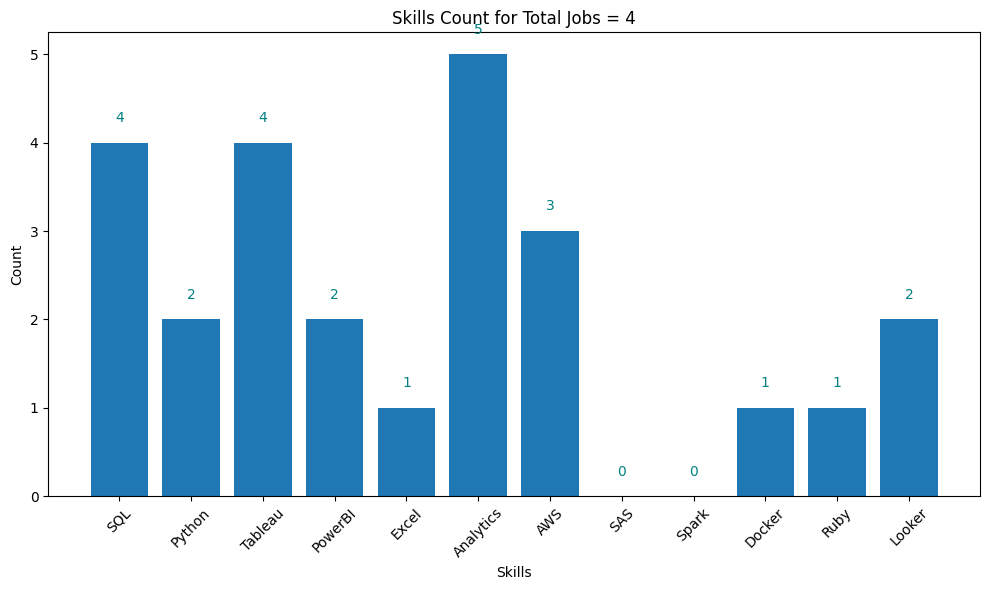

In [9]:
url_for_DA = 'https://4dayweek.io/remote-jobs/data-analyst'

predefined_skills_for_DA = ['SQL', 'Python', 'Tableau', 'PowerBI', 'Excel', 'Analytics', 'AWS' ,'SAS', 'Spark', 'Docker', 'Ruby', 'Looker']

entryPoint( url_for_DA, predefined_skills_for_DA )

***

#### For Enginnering/Developer Roles

JSON Start :  556  	 JSON End :  130760
jobList:  ['"itemIds"', '[8218,7360,10598,10490,10489,10488,10441,10439,10006,9920,9774,9770,9669,9389,9213]']
[8218, 7360, 10598, 10490, 10489, 10488, 10441, 10439, 10006, 9920, 9774, 9770, 9669, 9389, 9213]  -  <class 'list'>  --  15
15 --  <class 'int'>
Skill Counts: 
 {'HTML': 1, 'CSS': 1, 'SQL': 9, 'Python': 8, 'JavaScript': 6, 'GraphQL': 4, 'React': 7, 'API': 10, 'AWS': 19, 'Cloud': 10, 'Django': 3, 'Elixir': 5, 'Ruby': 2, 'NoSQL': 3, 'Java': 8, 'Spring': 4, 'Docker': 4, 'Kafka': 7}
Skill Data: 
 {'Skill': ['HTML', 'CSS', 'SQL', 'Python', 'JavaScript', 'GraphQL', 'React', 'API', 'AWS', 'Cloud', 'Django', 'Elixir', 'Ruby', 'NoSQL', 'Java', 'Spring', 'Docker', 'Kafka'], 'Count': [1, 1, 9, 8, 6, 4, 7, 10, 19, 10, 3, 5, 2, 3, 8, 4, 4, 7]}


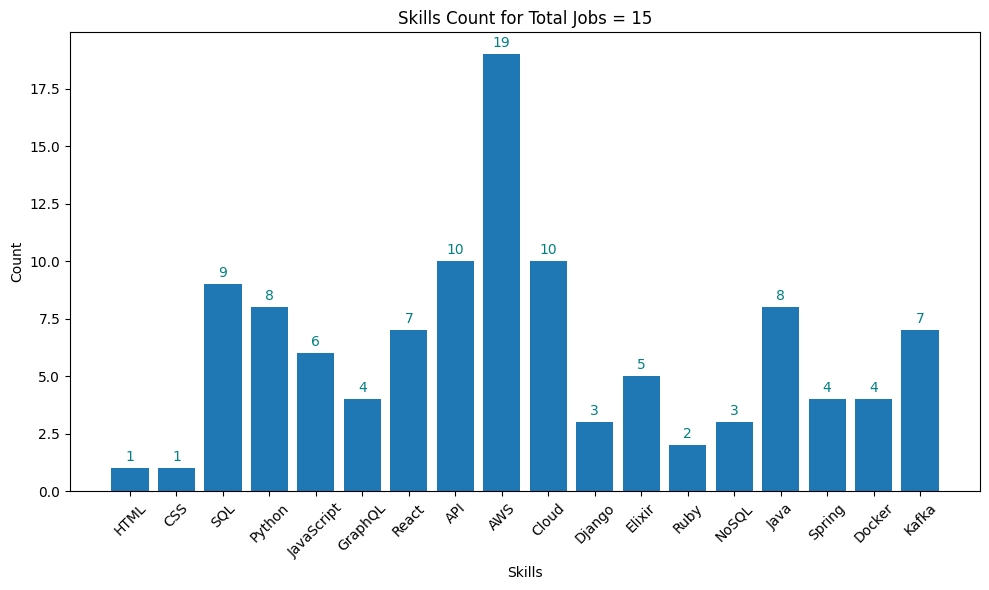

In [10]:
url_for_Dev = 'https://4dayweek.io/remote-jobs/engineering'

predefined_skills_for_Dev = ['HTML','CSS','SQL', 'Python', 'JavaScript', 'GraphQL', 'React', 'API', 'AWS' , 'Cloud', 'Django', 'Elixir', 'Ruby', 'NoSQL', 'Java', 'Spring', 'Docker', 'Kafka']

entryPoint( url_for_Dev, predefined_skills_for_Dev )

***

#### For Python Developer Roles

JSON Start :  556  	 JSON End :  113011
jobList:  ['"itemIds"', '[8218,10489,10006,9920,9775,9774,9714,9164,9070,9069,8596,8113,8091,8062,8059]']
[8218, 10489, 10006, 9920, 9775, 9774, 9714, 9164, 9070, 9069, 8596, 8113, 8091, 8062, 8059]  -  <class 'list'>  --  15
15 --  <class 'int'>
Skill Counts: 
 {'SQL': 11, 'Python': 20, 'Django': 0, 'Kafka': 4, 'API': 6, 'AWS': 3, 'Cloud': 6, 'Flask': 2, 'NoSQL': 1, 'Docker': 2, 'Kubernetes': 8}
Skill Data: 
 {'Skill': ['SQL', 'Python', 'Django', 'Kafka', 'API', 'AWS', 'Cloud', 'Flask', 'NoSQL', 'Docker', 'Kubernetes'], 'Count': [11, 20, 0, 4, 6, 3, 6, 2, 1, 2, 8]}


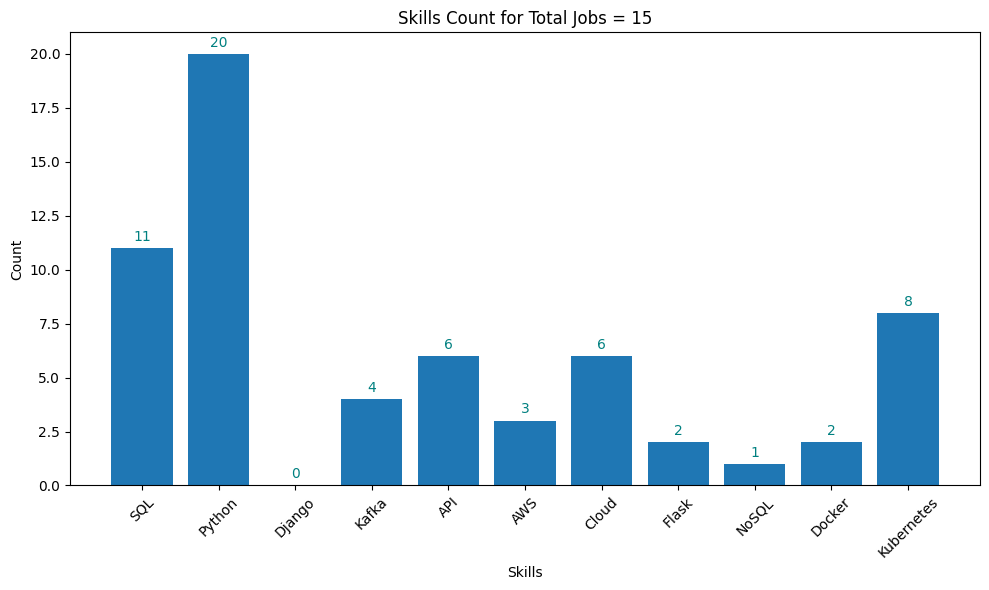

In [166]:
url_for_py = 'https://4dayweek.io/remote-jobs/python'

predefined_skills_for_py = ['SQL', 'Python', 'Django', 'Kafka', 'API', 'AWS' , 'Cloud', 'Django', 'Flask', 'Kafka', 'NoSQL', 'Docker', 'Kubernetes' ]

entryPoint( url_for_py, predefined_skills_for_py )

***

#### For Java Developer Roles

JSON Start :  556  	 JSON End :  54524
jobList:  ['"itemIds"', '[10598,10489,10439,10006,9920,7835,7780]']
[10598, 10489, 10439, 10006, 9920, 7835, 7780]  -  <class 'list'>  --  7
7 --  <class 'int'>
Skill Counts: 
 {'SQL': 6, 'Python': 5, 'Spring': 4, 'Java': 11, 'Splunk': 0, 'AWS': 17, 'Cloud': 8, 'Kafka': 9, 'GCP': 5, 'NoSQL': 2, 'Docker': 5, 'Kubernetes': 2}
Skill Data: 
 {'Skill': ['SQL', 'Python', 'Spring', 'Java', 'Splunk', 'AWS', 'Cloud', 'Kafka', 'GCP', 'NoSQL', 'Docker', 'Kubernetes'], 'Count': [6, 5, 4, 11, 0, 17, 8, 9, 5, 2, 5, 2]}


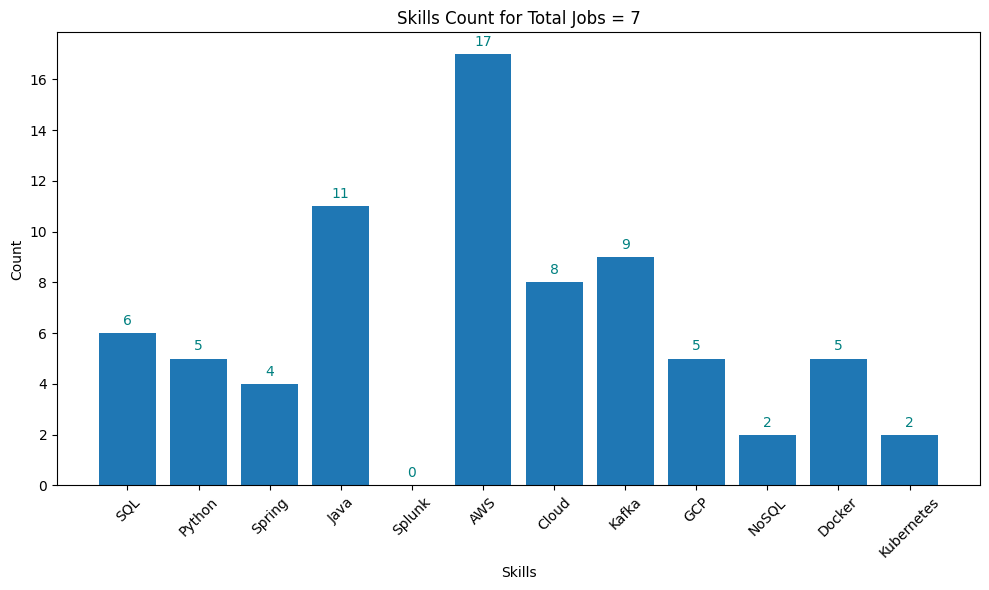

In [167]:
url_for_java = 'https://4dayweek.io/remote-jobs/java'

predefined_skills_for_java = ['SQL', 'Python', 'Spring', 'Java', 'Splunk', 'AWS' , 'Cloud', 'Kafka', 'GCP', 'NoSQL', 'Docker', 'Kubernetes' ]

entryPoint( url_for_java, predefined_skills_for_java )


***

#### Conclusion:
- After Visualizing the Data we found out rightfully, **AWS** comes out as a clear winner amongst Cloud Technologies, irrespective of the Job Role
- **Python**, **SQL**, **Java**, **Kafka** and **Cloud Technologies** skills are some of the most sought-after skills    
- Creating **API's** using different languages seems like the most common Task.

---
___
*******